**LAB 03: Exploration Data Analysis & Feature Engineering**

---

🎯 **Mục tiêu bài lab:**
- Thực hành Clean Data

- Thực hành EDA

  - Phân phối dữ liệu
  - Tương quan dữ liệu

- Thực hành Feature Engineering
  - Biến đổi feature
  - Tạo mới feature

📖 **Hướng dẫn:**

- Học viên đọc hiểu bài lab, 
- Thực hiện các block code với tag #TODO , 
- Có thể tham khảo solution tại [notebook solution](https://github.com/VietinBank/training-resources/tree/main/solution)

🍺 Happy coding!

In [ ]:
#@title Import thư viện

# Pandas tương tác dữ liệu
import pandas as pd
# Thư viện seaborn cho data visualization
import seaborn as sns

## EDA

Đọc dữ liệu với pandas

In [ ]:
data_url = 'https://raw.githubusercontent.com/VietinBank/training-resources/main/labs/data/taxi-trips.csv'
data = pd.read_csv(data_url)

In [ ]:
columns = ['vendor_id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','tolls_amount','fare_amount']
data = data[columns]
data.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,tolls_amount,fare_amount
0,VTS,2014-09-25T17:52:00Z,2014-09-25T17:55:00Z,-73.952468,40.778385,-73.946475,40.778037,1.0,1,0.0,4.0
1,VTS,2015-01-13T21:00:17Z,2015-01-13T21:04:00Z,-73.986580,40.743038,-73.979614,40.749275,1.0,1,0.0,5.0
2,VTS,2012-09-16T18:31:00Z,2012-09-16T18:37:00Z,-73.992253,40.749037,-73.992337,40.754282,1.0,1,0.0,5.5
3,CMT,2009-10-06T06:59:23Z,2009-10-06T07:05:17Z,-73.955573,40.772578,-73.971895,40.759947,NaN,1,0.0,6.5
4,VTS,2014-05-17T15:15:00Z,2014-05-17T15:22:00Z,-73.977492,40.758347,-73.973467,40.763597,1.0,1,0.0,6.5


**Ý nghĩa tập dữ liệu**

Tập dữ liệu bao về các chuyến taxi newyork. Dữ liệu free [tại đây](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

> vendor_id

Các hãng taxi
> pickup_datetime	/ dropoff_datetime

Thời gian đón/ trả khách
> pickup_longitude / pickup_latitude

Tọa độ đón khách
> dropoff_longitude	/ dropoff_latitude

Tọa độ trả khách
> rate_code

Đánh giá (sao)
> passenger_count	

Số khách / chuyến
> tolls_amount

Phí đường bộ

> fare_amount

Phí vận chuyển (label)





In [ ]:
#TODO 1: Info dữ liệu, kiểu dữ liệu của từng trường
#code


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27653 entries, 0 to 27652
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          27653 non-null  object 
 1   pickup_datetime    27653 non-null  object 
 2   dropoff_datetime   27653 non-null  object 
 3   pickup_longitude   27653 non-null  float64
 4   pickup_latitude    27653 non-null  float64
 5   dropoff_longitude  27653 non-null  float64
 6   dropoff_latitude   27653 non-null  float64
 7   rate_code          23232 non-null  float64
 8   passenger_count    27653 non-null  int64  
 9   tolls_amount       27653 non-null  float64
 10  fare_amount        27653 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
#TODO 2: Thống kê cơ bản của dữ liệu
#code


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,tolls_amount,fare_amount
count,27653.000000,27653.000000,27653.000000,27653.000000,23232.000000,27653.000000,27653.000000,27653.000000
mean,-73.975496,40.751002,-73.974650,40.751298,1.033962,1.691607,0.219148,11.132806
std,0.044582,0.033646,0.042000,0.037656,0.264741,1.341916,1.110672,9.155179
min,-75.454573,39.609617,-75.454573,39.604415,0.000000,0.000000,0.000000,2.500000
25%,-73.992491,40.736573,-73.991623,40.735586,1.000000,1.000000,0.000000,6.000000
50%,-73.982212,40.753323,-73.980723,40.753925,1.000000,1.000000,0.000000,8.500000
75%,-73.968492,40.767550,-73.965580,40.768310,1.000000,2.000000,0.000000,12.500000
max,-73.137393,41.804528,-73.137393,41.811812,5.000000,51.000000,23.500000,194.750000


In [ ]:
# giá trị riêng của mỗi trường
data.nunique()

vendor_id                3
pickup_datetime      10227
dropoff_datetime     20895
pickup_longitude     22090
pickup_latitude      23087
dropoff_longitude    22559
dropoff_latitude     23515
rate_code                6
passenger_count          8
tolls_amount            47
fare_amount            324
dtype: int64

## Visualize data

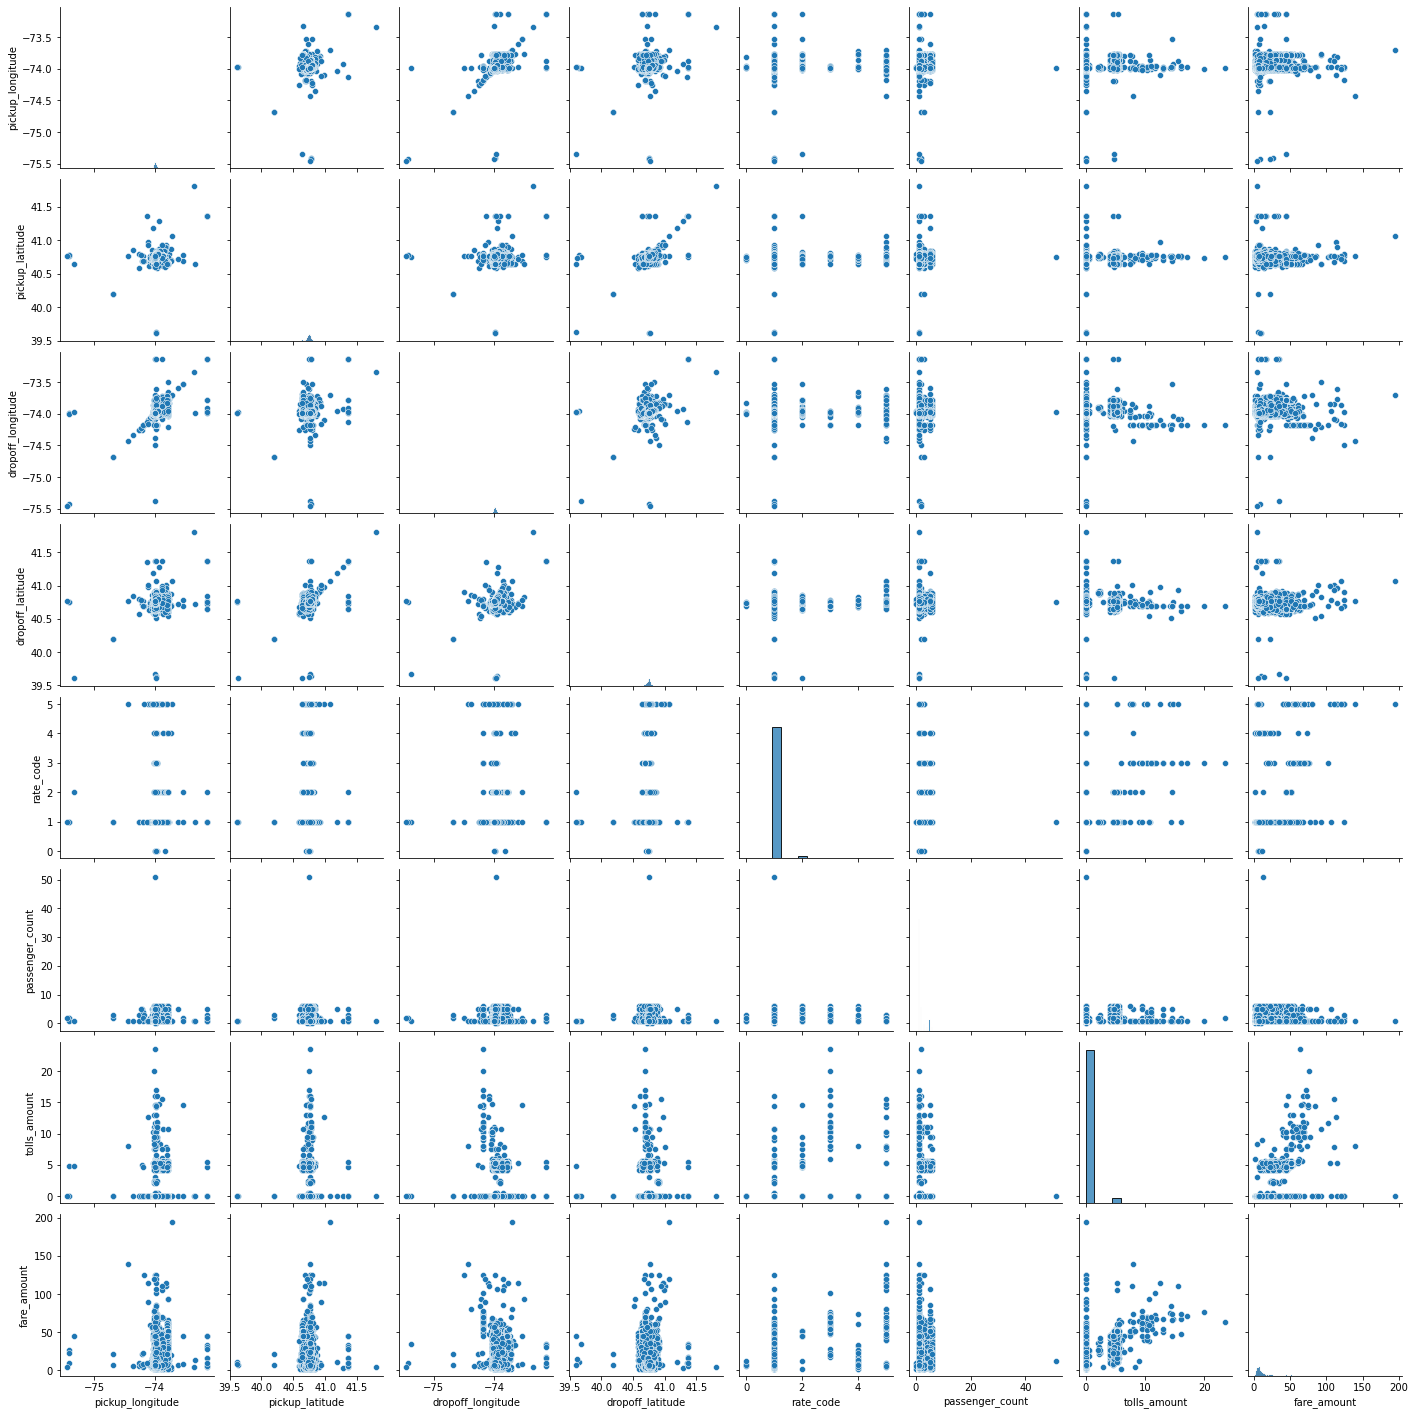

In [ ]:
sns.pairplot(data)

Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


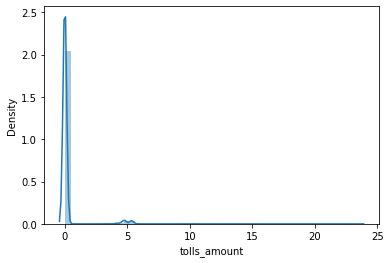

In [ ]:
sns.distplot(data['tolls_amount']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


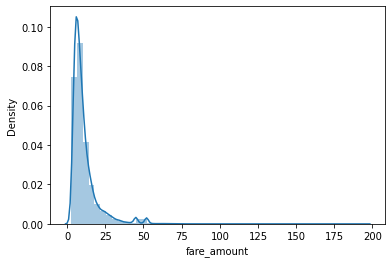

In [ ]:
sns.distplot(data['fare_amount']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


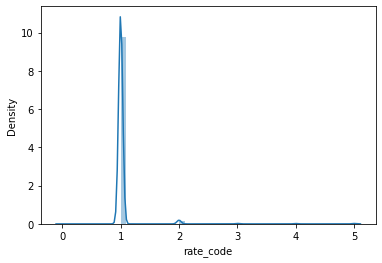

In [ ]:
sns.distplot(data['rate_code']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


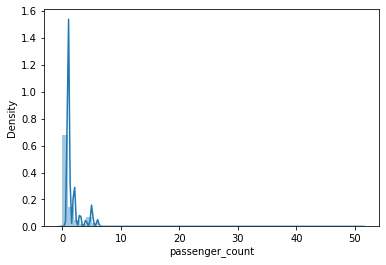

In [ ]:
sns.distplot(data['passenger_count']);

Tương tác features

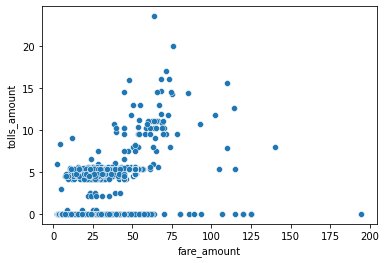

In [ ]:
sns.scatterplot(x='fare_amount', y = 'tolls_amount', data=data)

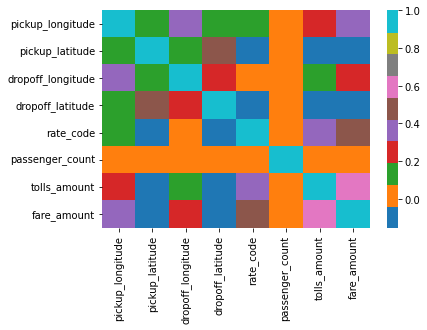

In [ ]:
sns.color_palette("tab10")
sns.heatmap(data.corr(),cmap='tab10')

**Nhận xét về dữ liệu**


```
#TODO 3:
```
- Các trường numerical: 

  - passenger_count: ...
  - ...

- Các trường categorical: 
  - vendor_id: ...
- Trường datetime: 
  - ...

## Clean / Extract data

**Extract feature** day, hour từ pickup_datetime

In [ ]:
# Đưa trường datetime về đúng định dạng
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
# Extract dayofweek, hourofday
data['day'] = data['pickup_datetime'].dt.dayofweek
data['hour'] = data['pickup_datetime'].dt.hour

In [ ]:
data = data.drop(['pickup_datetime','dropoff_datetime'],axis=1)

fare_amount được cộng dồn từ phí taxi + phí đường bộ

In [ ]:
data['fare_amount'] = data['fare_amount'] + data['tolls_amount']
data = data.drop('tolls_amount',axis=1)

Xóa **Outlier** với passenger_count = 0 

In [ ]:
data = data[data['passenger_count'] !=0].reset_index(drop=True)

In [ ]:
# backup raw data
data_raw = data

Xử lý dữ liệu null

1.0    22684
2.0      407
3.0       49
5.0       44
4.0       38
0.0        6
Name: rate_code, dtype: int64


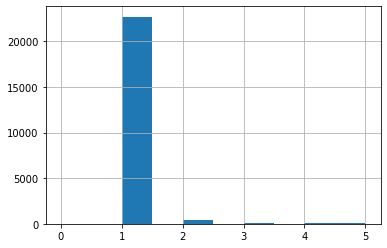

In [ ]:
print(data['rate_code'].value_counts())
data['rate_code'].hist()

In [ ]:
# Chọn chiến lược impute giá trị phổ biến nhất

# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# data['rate_code'] = imp_mean.fit_transform(data['rate_code'])

data['rate_code'] = data['rate_code'].fillna(1)

Check lại dữ liệu

In [ ]:
data.head(5)

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour
0,VTS,-73.952468,40.778385,-73.946475,40.778037,1.0,1,4.0,3,17
1,VTS,-73.986580,40.743038,-73.979614,40.749275,1.0,1,5.0,1,21
2,VTS,-73.992253,40.749037,-73.992337,40.754282,1.0,1,5.5,6,18
3,CMT,-73.955573,40.772578,-73.971895,40.759947,1.0,1,6.5,1,6
4,VTS,-73.977492,40.758347,-73.973467,40.763597,1.0,1,6.5,5,15


Wrap code to function
```python
  def clean_data(dataframe df):
    .... do something
  data = clean_data(data)
```

Trong thực tế, KHÔNG nên sử dụng dữ liệu testing cho xử lý dữ liệu. Được xem xét là treating

## Baseline model

👉 Luôn nên xây dựng baseline model. Nó làm cơ sở để so sánh những bước xử lý dữ liệu về sau hiệu quả như thế nào

In [ ]:
num_columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','day','hour']
X = data[num_columns]
y = data['fare_amount']

In [ ]:
# Sử dụng model LinearRegression đơn giản
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# TODO 4: Hoàn thành việc phân chia dữ liệu train/ test
X_train, X_test, y_train, y_test = train_test_split(...

In [ ]:
print('train row count: {}'.format(X_train.shape[0]))
print(y_train.count())
print('test row count: {}'.format(X_test.shape[0]))
print(y_test.count())

train row count: 22119
22119
test row count: 5530
5530


In [ ]:
# model
model = LinearRegression()
# training model
model.fit(X_train, y_train)

LinearRegression()

**Đánh giá mô hình baseline**

Nhắc lại về các loss metric đánh giá mô hình

$MAE = \frac{1}{m}\sum^{m}_{i=1}|h(x^{(i)})-y^{(i)}|$


$MSE = \frac{1}{m}\sum^{m}_{i=1}(y^{(i)} - \hat{y}^{(i)})^2$


$RMSE = \sqrt{\frac{1}{m}\sum^{m}_{i=1}(h(x^{(i)})-y^{(i)})^2}$



In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = model.predict(X_test)
# Kiểm tra loss của model
mean_squared_error(y_test, y_predict) 

56.66366387407696

## Feature Engineering

In [ ]:
data

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour
0,VTS,-73.952468,40.778385,-73.946475,40.778037,1.0,1,4.0,3,17
1,VTS,-73.986580,40.743038,-73.979614,40.749275,1.0,1,5.0,1,21
2,VTS,-73.992253,40.749037,-73.992337,40.754282,1.0,1,5.5,6,18
3,CMT,-73.955573,40.772578,-73.971895,40.759947,1.0,1,6.5,1,6
4,VTS,-73.977492,40.758347,-73.973467,40.763597,1.0,1,6.5,5,15
...,...,...,...,...,...,...,...,...,...,...
27644,CMT,-73.992033,40.750073,-73.988369,40.738649,1.0,1,5.7,1,8
27645,VTS,-73.942337,40.790642,-73.950375,40.798187,1.0,1,5.7,2,8
27646,CMT,-73.999603,40.728315,-73.982927,40.730796,1.0,2,5.7,1,5
27647,VTS,-73.990192,40.756347,-73.983558,40.761307,1.0,1,5.7,2,20


**One-hot encode**

In [ ]:
# Sử dụng OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

onehot_encoded_vendor= onehot.fit_transform(data[["vendor_id"]])

In [ ]:
data = data.drop('vendor_id',axis=1)
df_vendor = pd.DataFrame(onehot_encoded_vendor,columns = onehot.get_feature_names_out(['vendor_id']))
# concat
data = pd.concat([data,df_vendor],axis = 1)
data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_DDS,vendor_id_VTS
0,-73.952468,40.778385,-73.946475,40.778037,1.0,1,4.0,3,17,0.0,0.0,1.0
1,-73.986580,40.743038,-73.979614,40.749275,1.0,1,5.0,1,21,0.0,0.0,1.0
2,-73.992253,40.749037,-73.992337,40.754282,1.0,1,5.5,6,18,0.0,0.0,1.0
3,-73.955573,40.772578,-73.971895,40.759947,1.0,1,6.5,1,6,1.0,0.0,0.0
4,-73.977492,40.758347,-73.973467,40.763597,1.0,1,6.5,5,15,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27644,-73.992033,40.750073,-73.988369,40.738649,1.0,1,5.7,1,8,1.0,0.0,0.0
27645,-73.942337,40.790642,-73.950375,40.798187,1.0,1,5.7,2,8,0.0,0.0,1.0
27646,-73.999603,40.728315,-73.982927,40.730796,1.0,2,5.7,1,5,1.0,0.0,0.0
27647,-73.990192,40.756347,-73.983558,40.761307,1.0,1,5.7,2,20,0.0,0.0,1.0


**Tạo mới feature**

Tính khoảng cách euclide từ pickup_longitude	/ pickup_latitude	dropoff_longitude /	dropoff_latitude

1. Euclide distance (L2 distance)

![image](https://images.viblo.asia/5964d828-bd19-41d6-940b-49de91baf4a4.png)

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/2e0c9ce1b3455cb9e92c6bad6684dbda02f69c82)

2. Manhattan Distance (L1 distance)

![image](https://images.viblo.asia/64f82926-3a2a-4dbc-9bb8-05582c4c0d10.png)

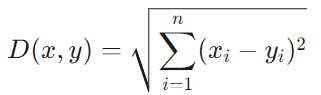

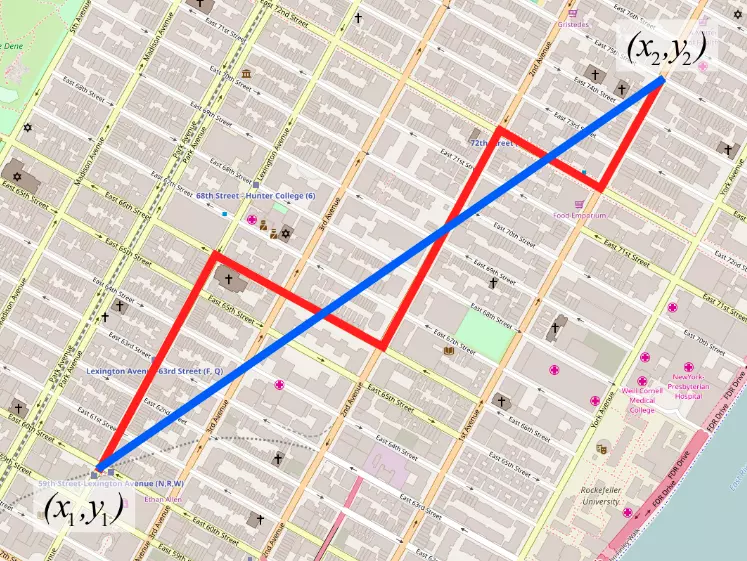



In [ ]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [ ]:
# Tạo mới feature distance 
data['distance'] = minkowski_distance(data.pickup_longitude, data.dropoff_longitude, 
                                           data.pickup_latitude, data.dropoff_latitude, 1)


In [ ]:
data.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_DDS,vendor_id_VTS,distance
0,-73.952468,40.778385,-73.946475,40.778037,1.0,1,4.0,3,17,0.0,0.0,1.0,0.006341
1,-73.986580,40.743038,-73.979614,40.749275,1.0,1,5.0,1,21,0.0,0.0,1.0,0.013203
2,-73.992253,40.749037,-73.992337,40.754282,1.0,1,5.5,6,18,0.0,0.0,1.0,0.005329
3,-73.955573,40.772578,-73.971895,40.759947,1.0,1,6.5,1,6,1.0,0.0,0.0,0.028953
4,-73.977492,40.758347,-73.973467,40.763597,1.0,1,6.5,5,15,0.0,0.0,1.0,0.009275


**Bucketized feature**

👉 kinh độ và vĩ độ bins

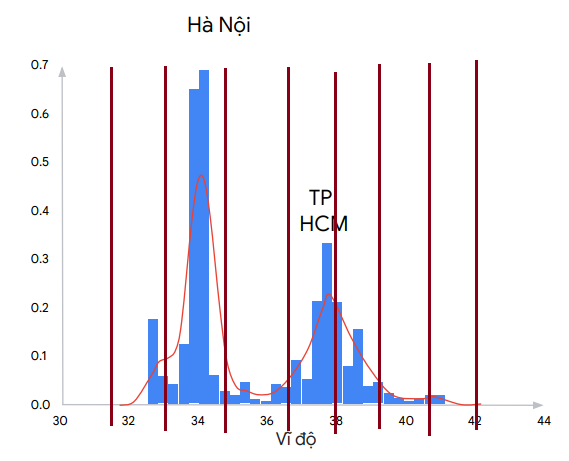

In [ ]:
import numpy as np

step = 0.01
to_bin = lambda x: np.floor(x / step) * step
data["pickup_latitude"] = to_bin(data.pickup_latitude)
data["pickup_longitude"] = to_bin(data.pickup_longitude)
data["dropoff_latitude"] = to_bin(data.dropoff_latitude)
data["dropoff_longitude"] = to_bin(data.dropoff_longitude)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


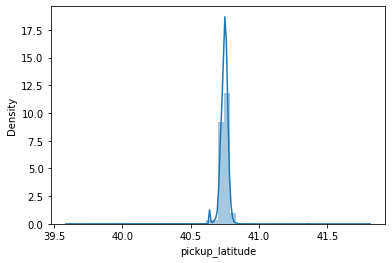

In [ ]:
# check lại phân phối
sns.distplot(data.pickup_latitude)

**Feature cross**

day & hour: giờ và ngày trong tuần quan hệ ntn?

👉 nên tạo feature mới để thể hiện mối quan hệ của giờ trong tuần. Ví dụ giá taxi của trưa thứ 4 giữa tuần vs tối thứ 6 cuối tuần

In [ ]:
#data['day_hour'] = data.apply(lambda x: "{}_{}".format(x['day'],x['hour']),axis =1)
data['day_hour'] = data.apply(lambda x: x['day']*x['hour'],axis =1)

In [ ]:
data.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,fare_amount,day,hour,vendor_id_CMT,vendor_id_DDS,vendor_id_VTS,distance,day_hour
0,-73.96,40.77,-73.95,40.77,1.0,1,4.0,3,17,0.0,0.0,1.0,0.006341,51.0
1,-73.99,40.74,-73.98,40.74,1.0,1,5.0,1,21,0.0,0.0,1.0,0.013203,21.0
2,-74.00,40.74,-74.00,40.75,1.0,1,5.5,6,18,0.0,0.0,1.0,0.005329,108.0
3,-73.96,40.77,-73.98,40.75,1.0,1,6.5,1,6,1.0,0.0,0.0,0.028953,6.0
4,-73.98,40.75,-73.98,40.76,1.0,1,6.5,5,15,0.0,0.0,1.0,0.009275,75.0


**Tạo mới model sau thực hiện Feature Engineering**

In [ ]:
num_columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rate_code','passenger_count','fare_amount','day','hour','vendor_id_CMT','vendor_id_VTS','distance','day_hour']
X = data[num_columns]
y = data['fare_amount']

In [ ]:
# Sử dụng model LinearRegression đơn giản
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=69)

In [ ]:
# định nghĩa model
model = LinearRegression()
# training model
#TODO 5: Huấn luyện mô hình

model.fit(...

LinearRegression()

In [ ]:
y_predict = model.predict(X_test)

#TODO 6: Đánh giá mô hình



6.770088452790102e-29

## So sánh mô hình

Ta so sánh mô hình baseline và mô hình sau feature engineering

| Model          | MSE loss | Description                                  |
|----------------|-----------|----------------------------------------------|
| baseline_model | 0.69      | Baseline model - no feature engineering    |
| model_1        | 0.5e-30      | Model with feature engineering |

👉 Mô hình tốt hơn rất nhiều sau khi được Feature Engineering với hiểu biết về dữ liệu sau quá trình EDA

# Tổng kết

> Qua bài lab học viên nắm được các kiến thức
- Clean Data
- EDA
- Feature Engineering
- Tạo model regression đơn giản

# Optional

- pipeline
- function